In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.tree import export_graphviz
#import pydotplus

In [7]:
df = pd.read_csv('data_book_clean.csv')
df.head()

,Unnamed: 0,autor,cod_autor,cod_sello_editorial,coleccion,contratapa,digital,fecha_nov,genero_1,idioma,...,medidas,paginas,portada,pvp,region,sello_editorial,sinopsis,titulo,texto,normal
0,0,Gabriel García Márquez,1.070000e+02,56,NARRATIVA,De viaje por Europa del Este es la crónica tes...,NaN,1970-01-01 00:00:00.020151101,NOVELAS LATINOAMERICANAS,ES,...,15 X 23,152.0,http://static.megustaleer.com.ar/images/libros...,299.0,AR,SUDAMERICANA,Recopilación de artículos periodísticos de car...,De viaje por Europa del Este,De viaje por Europa del Este es la crónica tes...,viaje europa crónica testimonial viaje realizó...
1,1,Gabriel García Márquez/Francisco Coloane/Leopo...,1.070052e+22,129,NARRATIVA,Prólogo de Arturo Pérez Reverte\nSelección de ...,NaN,1970-01-01 00:00:00.020100903,CUENTOS LATINOAMERICANOS,ES,...,15 X 24,400.0,http://static.megustaleer.com.ar/images/libros...,699.0,AR,ALFAGUARA,NaN,Cuentos de navegantes,Prólogo de Arturo Pérez Reverte\nSelección de ...,prólogo arturo pérez reverte selección juan ba...
2,2,Fernando Savater,1.500000e+02,23,BEST SELLER,¿Qué vigencia tienen los diez Mandamientos? ¿S...,NaN,1970-01-01 00:00:00.020050901,ENSAYOS,ES,...,12.5X19,184.0,http://static.megustaleer.com.ar/images/libros...,329.0,AR,DEBOLS!LLO,"Fernando Savater, filósofo agnóstico, analiza ...",Los diez mandamientos en el siglo 21,Qué vigencia tienen los diez Mandamientos Sigu...,vigencia diez mandamientos siguen siendo guíaé...
3,3,Fernando Savater,1.500000e+02,23,BEST SELLER,«Se mezclan en los pecados cuestiones religios...,NaN,1970-01-01 00:00:00.020060801,ENSAYOS,ES,...,12.5 X 19,160.0,http://static.megustaleer.com.ar/images/libros...,249.0,AR,DEBOLS!LLO,"Soberbia, pereza, gula, envidia, ira, avaricia...",Los siete pecados capitales,Se mezclan en los pecados cuestiones religiosa...,mezclan pecados cuestiones religiosas históric...
4,4,Pablo Montoya,4.160000e+02,124,LITERATURA RANDOM HOUSE,Tres pintores europeos narran la historia. Jac...,NaN,1970-01-01 00:00:00.020160601,NOVELA,ES,...,"13,5 X 23",312.0,http://static.megustaleer.com.ar/images/libros...,589.0,AR,LITERATURA RANDOM HOUSE,Tríptico de la infamia relata las complejas re...,Tríptico de la infamia,Tres pintores europeos narran la historia. Jac...,tres pintores europeos narran historia jacques...


In [393]:
# Instanciamos el label encoder para aplicarselo a la clase que vamos a predecir: generos litearios
# Tambien si queremos encodear otras variables
le = preprocessing.LabelEncoder()

GENEROS LITERARIOS

In [9]:
# Filtrar losgeneros con menos de 100 libros publicados
df2 = df.groupby('genero_1').filter(lambda x: x['genero_1'].count()>100)

In [10]:
# Generos con mas de 100 libros
df2['genero_1'].value_counts()

ENSAYOS                     1159
INFANTILES                  1025
NOVELAS EXTRANJERAS         1002
NARRATIVA                    565
OBRAS DIVERSAS               502
NOVELAS ARGENTINAS           481
AUTOAYUDA                    393
BIOGRAFIAS                   283
NOVELA                       245
JUVENILES                    218
FICCION                      179
NOVELAS LATINOAMERICANAS     135
CUENTOS ARGENTINOS           127
Name: genero_1, dtype: int64

In [11]:
# Nos quedamos con 6314 casos
len(df2)

6314

In [12]:
# Reseteamos el indice del dataframe (despues de haber excluidos algunos generos)
df2.reset_index(inplace=True)

CANTIDAD DE LIBROS POR AUTOR

In [55]:
# Vemos cuantas veces aparece cada autor
autores = df2.groupby('autor')['autor'].count()

In [57]:
autores = autores.sort_values(ascending = False)

In [72]:
with pd.option_context('display.max_rows', 1500):
    print(autores)

autor
 Nik                                                                                                                                                                                                                                       127
 Chanti                                                                                                                                                                                                                                     74
Julio Cortázar                                                                                                                                                                                                                              63
Stephen King                                                                                                                                                                                                                                60
Danielle Steel                        

In [97]:
df_autcount = pd.DataFrame(autores)

In [103]:
df_autcount['nombres'] = df_autcount.index

In [100]:
# Vemos los valores unicos para las frecuencias de autores: hay autores que aparecen 127 veces, 74 veces, etc.
df_autcount['autor'].unique()

array([127,  74,  63,  60,  55,  54,  49,  42,  41,  39,  37,  35,  34,
        30,  29,  28,  26,  24,  23,  22,  21,  20,  19,  18,  17,  16,
        15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,   3,
         2,   1], dtype=int64)

In [150]:
# Generar un DataFrame para identificar las veces exactas que aparece cada autor o grupo de autores y poder plotear

# Agrupo los autores
aut = df2.groupby('autor')['autor'].count()

# Genero el primer df
aut_count = pd.DataFrame(aut)

# Creo la columna 'nombres' de los autores
aut_count['nombres'] = aut_count.index

# Creo la columna 'veces' que aparece el autor
aut_count['veces'] = aut_count['autor']

# Borro la columna 'autor'
aut_count.drop(columns='autor', inplace=True)

# Seteo un indice numerico
aut_count.index = range(len(aut_count))

In [151]:
# Veo el DataFrame. Coincide con el anterior ('autores')
aut_count.sort_values('veces',ascending=False);

Text(0,0.5,'Cantidad de autores')

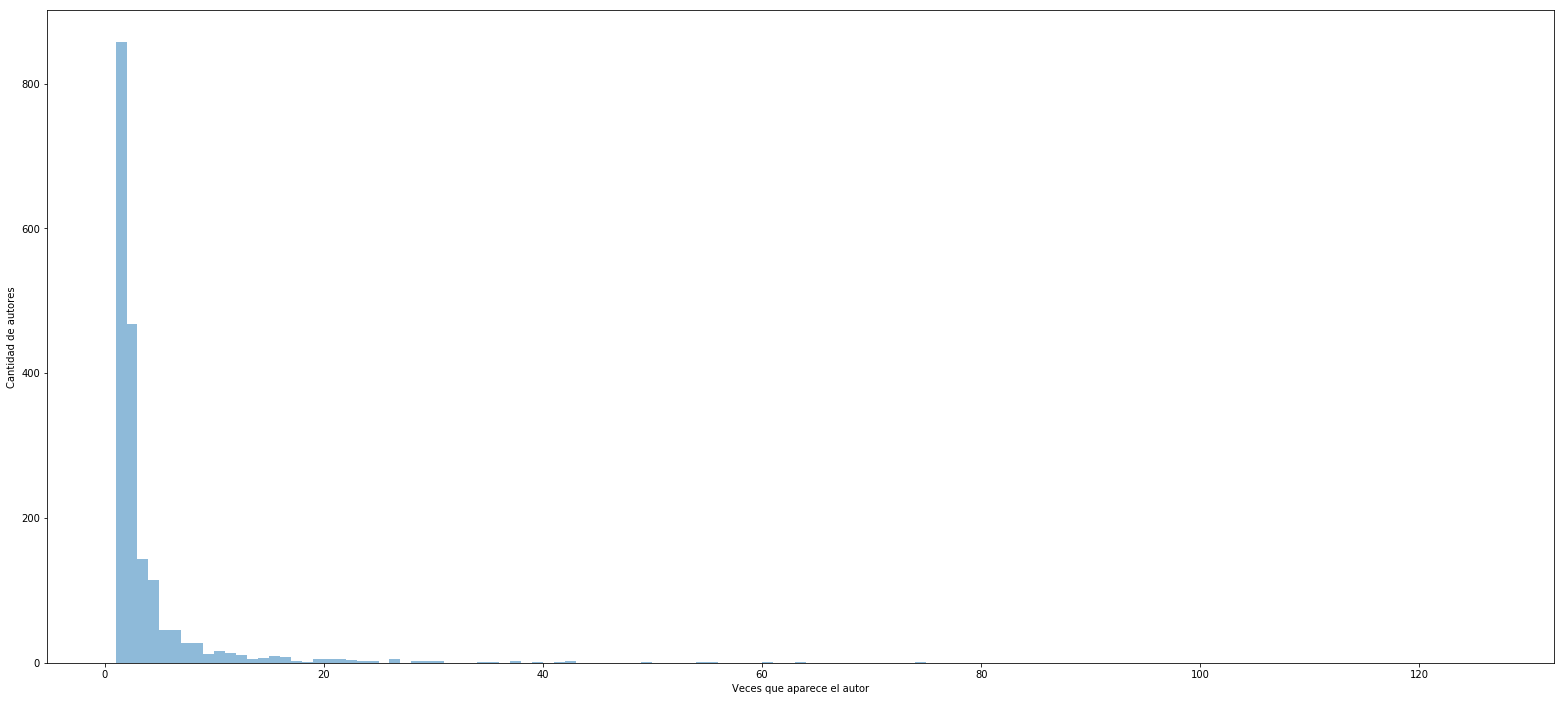

In [207]:
# Histograma de la distribucion de autores

bins = np.arange(aut_count['veces'].min(), aut_count['veces'].max())
plt.figure(figsize=(27,12))
plt.hist(aut_count['veces'], bins=bins, alpha = 0.5)
plt.xlabel('Veces que aparece el autor')
plt.ylabel('Cantidad de autores')

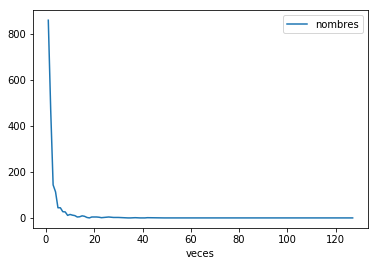

In [212]:
# La mayoria de los autores tienen entre 1 y 6 libros aproximadamente
aut_count.groupby('veces').count().plot()

In [234]:
# Hay 1867 autores
aut_count['nombres'].count()

1867

In [226]:
# Creo una funcion para categorizar las frecuencias en las que aparecen los autores

def categorizer(x):
    if 0 < x <= 6:
        return 'Entre 1 y 6 veces'
    elif 6 < x <= 127:
        return 'Mas de 6 veces'

In [227]:
# Aplico la funcion

aut_count['frecuencias'] = aut_count['veces'].apply(categorizer)

In [231]:
# De nuestro dataframe, el 10% de los autores tienen mas de seis libros publicados. En cambio, el 90% tiene entre 1 y 6 libros

aut_count.frecuencias.value_counts(normalize=True)

Entre 1 y 6 veces    0.896626
Mas de 6 veces       0.103374
Name: frecuencias, dtype: float64

In [64]:
# Creo una variable dummy para pasarle al modelo de clasificacion los nombres de los autores

df2['aut_dum'] = df2['autor']

C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [248]:
# Identifico a los autores mayoritarios (los que tienen menos de seis libros publicados)

autores_mayoritarios = aut_count.loc[aut_count['frecuencias'] == 'Entre 1 y 6 veces']

In [252]:
# Los apendeo en una lista para poder reemplazarlos en el DataFrame

aut_menos6 = []

for i in autores_mayoritarios['nombres']:
    aut_menos6.append(i)

In [253]:
# Chequeo cuantos son. Esta OK

len(aut_menos6)

1674

In [ ]:
# Esta es la funcion anonima que armo Diego. Es mas prolija y rapida de usar que la que arme yo (cuando la use al principio pense que no andaba porque no ubicaba la columna que genera en el DataFrame, pero esta OK)
# Para usarla hay que adaptar el nombre del df. Eso queda para la version final prolija

g = df.groupby('autor')
df.loc[g['autor'].transform(lambda x: len(x) < 5).astype(bool), 'autor'] = 'RARE_VALUE'

In [255]:
# Los reemplazo en el DataFrame

df2['aut_dum'].replace(aut_menos6,'otros', inplace=True)

C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


FECHA DE PUBLICACION DE NOVEDAD

In [265]:
# Llamo el DataFrame de Juan porque en el de Rodri el formato de la fecha estaba cambiado
df3 = pd.read_csv('df_sinopsis.csv')

In [266]:
df4 = df3.groupby('genero_1').filter(lambda x: x['genero_1'].count()>100)

In [268]:
df4.reset_index(inplace=True)

In [270]:
# Genero una columna con la fecha corregida
df2['fecha_corr'] = df4['fecha_nov']

C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [326]:
# Convierto a str la fecha para poder hacer slicing en los valores
df2['fecha_st'] = df2['fecha_corr'].astype(str)

C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [370]:
# Creo las tres columnas de fecha
df2['year'] = df2['fecha_st'].str[0:4]
df2['mes'] = df2['fecha_st'].str[4:6]
df2['dia'] = df2['fecha_st'].str[6:8]

C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [378]:
# Convierto en int la columna year
df2['year'] = df2['year'].astype('int64')

C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [389]:
# Le paso un label encoder al mes para pasarlo a int
df2['mes_en'] = le.fit_transform(df2['mes'])

C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [391]:
# Le paso un label encoder al dia para pasarlo a int
df2['dia_en'] = le.fit_transform(df2['dia'])

C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


PUBLICACION DIGITAL

In [14]:
# Convertimos el feature digital en dummy
df2['digital'].fillna(0, inplace=True)

C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [15]:
df2['digital'].unique()

array([0, 'X'], dtype=object)

In [16]:
df2['digital'].replace('X',1, inplace=True)

C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
df2['digital'].unique()

array([0, 1], dtype=int64)

In [435]:
df2['digital'] = df2['digital'].astype('int64')

C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CODIGO DEL SELLO EDITORIAL

In [445]:
df2['sello_en'] = le.fit_transform(df2['cod_sello_editorial'])

C:\Users\Federico\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


DATAFRAME FINAL: Tiene los autores como dummies, el año/mes de publicacion y si es digital

In [446]:
df_final = pd.get_dummies(df2,columns=['aut_dum'])

MODELO DE CLASIFICACION (CARTS)

In [474]:
# fiteamos el label encoder a los generos
le.fit(df_final['genero_1'])

LabelEncoder()

In [475]:
le.classes_

array(['AUTOAYUDA', 'BIOGRAFIAS', 'CUENTOS ARGENTINOS', 'ENSAYOS',
       'FICCION', 'INFANTILES', 'JUVENILES', 'NARRATIVA', 'NOVELA',
       'NOVELAS ARGENTINAS', 'NOVELAS EXTRANJERAS',
       'NOVELAS LATINOAMERICANAS', 'OBRAS DIVERSAS'], dtype=object)

In [476]:
# Transformamos
le.transform(df_final['genero_1'])

array([11,  3,  3, ...,  3,  8,  3], dtype=int64)

In [400]:
# Son 13 etiquetas a predecir
list(le.classes_)

['AUTOAYUDA',
 'BIOGRAFIAS',
 'CUENTOS ARGENTINOS',
 'ENSAYOS',
 'FICCION',
 'INFANTILES',
 'JUVENILES',
 'NARRATIVA',
 'NOVELA',
 'NOVELAS ARGENTINAS',
 'NOVELAS EXTRANJERAS',
 'NOVELAS LATINOAMERICANAS',
 'OBRAS DIVERSAS']

In [401]:
# Creamos la clase a predecir
y = le.transform(df_final['genero_1'])

In [402]:
y

array([11,  3,  3, ...,  3,  8,  3], dtype=int64)

In [403]:
X = df_final[['digital','cod_autor','cod_sello_editorial','pvp']]

In [404]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6314 entries, 0 to 6313
Data columns (total 4 columns):
digital                6314 non-null int64
cod_autor              6314 non-null float64
cod_sello_editorial    6314 non-null int64
pvp                    6314 non-null float64
dtypes: float64(2), int64(2)
memory usage: 197.4 KB


In [405]:
treeclf = DecisionTreeClassifier(max_depth=5, criterion='gini')
treeclf.fit(X, y)

print('CV_Score: ', np.mean(cross_val_score(treeclf, X, y)))

CV_Score:  0.33931107856


USANDO LAS FEATURES SIN TUNEAR EL MODELO ALCANZA UN SCORE DE 34% PARA PREDECIR 13 ETIQUETAS

In [428]:
# Generamos X2 con las nuevas features mejoradas (faltaria cod_sello encodeda)
X2 = []
for i in df_final:
    X2.append(i)

In [429]:
# Sacamos de X2 las columnas que no vamos a usar con una lista por comprension
X2 = [e for e in X2 if e not in ('index','Unnamed: 0','autor','cod_autor','cod_sello_editorial','coleccion','contratapa','fecha_nov','genero_1','idioma','isbn','matnr','medidas','paginas',
 'portada','region','sello_editorial','sinopsis','titulo','texto','normal','fecha_corr','fecha_st','mes','dia','dia_en')]

In [448]:
X2 = df_final[X2]

In [449]:
treeclf.fit(X2, y)

print('CV_Score: ', np.mean(cross_val_score(treeclf, X2, y)))

CV_Score:  0.362427896669


USANDO LAS FEATURES SIN TUNEAR EL MODELO ALCANZA UN SCORE DE 36%. MEJORA PERO POCO

In [454]:
treeclf.fit(X_train, y_train)
print('CV_Score: ', np.mean(cross_val_score(treeclf, X2, y)))

CV_Score:  0.362269468278


PRUEBA CON GRID SEARCH

In [460]:
PARAMETROS = {'max_depth':[1,2,3,4,5,6], 'max_features':[1,2,3,4], 
              'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[2,3,4]}

In [462]:
gs = GridSearchCV(treeclf, PARAMETROS, verbose=1 , n_jobs=-1)

In [463]:
gs.fit(X2, y)

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 838 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 1538 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 3538 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4838 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed:  1.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6], 'max_features': [1, 2, 3, 4], 'max_leaf_nodes': [5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [464]:
print(gs.best_estimator_)
print(gs.best_score_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=4, max_leaf_nodes=10, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.293316439658


CON GD NO MEJORA, ESTARE HACIENDO ALGO MAL?

In [467]:
# Importancia de los atributos
pd.DataFrame({'Atributo':X2.columns,
              'importancia':treeclf.feature_importances_}).sort_values('importancia',
                                                                      ascending=False).head()

,Atributo,importancia
198,sello_en,0.604199
1,pvp,0.244118
0,digital,0.094777
165,aut_dum_Pepe Muleiro,0.025279
197,aut_dum_otros,0.008603


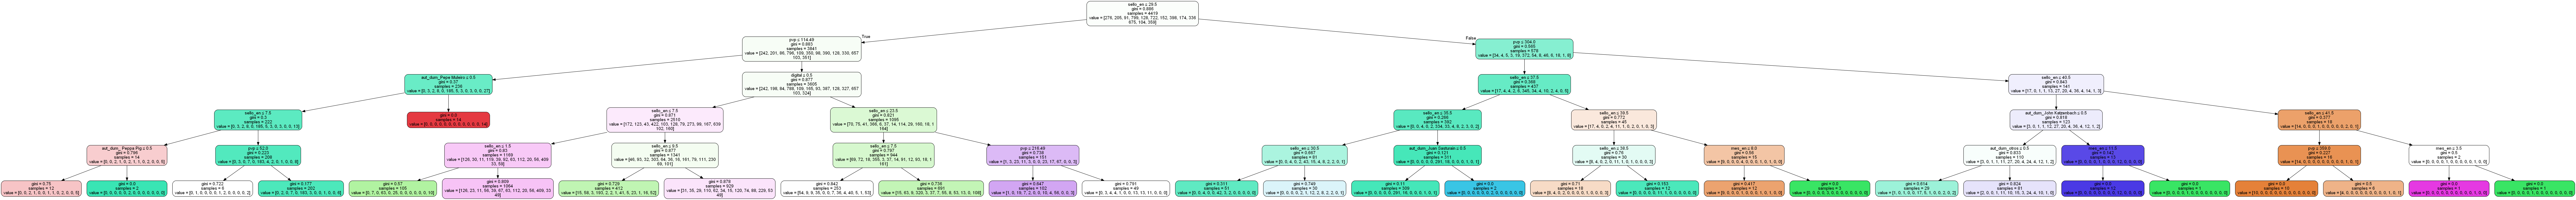

In [468]:
# Visualizacion del arbol

dot_data = export_graphviz(treeclf, out_file=None,  
                feature_names=X2.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [471]:
# Calcular y mostrar la matriz de confusión
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y, treeclf.predict(X2))

In [478]:
predicted_cols = ['pred_'+c for c in le.classes_]
pd.DataFrame(conf, index = le.classes_, columns = predicted_cols)

,pred_AUTOAYUDA,pred_BIOGRAFIAS,pred_CUENTOS ARGENTINOS,pred_ENSAYOS,pred_FICCION,pred_INFANTILES,pred_JUVENILES,pred_NARRATIVA,pred_NOVELA,pred_NOVELAS ARGENTINAS,pred_NOVELAS EXTRANJERAS,pred_NOVELAS LATINOAMERICANAS,pred_OBRAS DIVERSAS
AUTOAYUDA,114,0,0,47,2,1,0,0,5,2,222,0,0
BIOGRAFIAS,15,0,0,181,0,3,0,4,1,0,79,0,0
CUENTOS ARGENTINOS,12,0,0,21,0,6,2,7,0,21,56,0,2
ENSAYOS,55,0,0,828,0,10,0,6,1,11,246,0,2
FICCION,5,0,0,5,7,0,2,1,19,2,138,0,0
INFANTILES,0,0,0,94,0,782,1,0,12,0,136,0,0
JUVENILES,9,0,0,15,0,42,16,1,25,0,108,0,2
NARRATIVA,42,0,0,145,0,5,2,18,5,15,332,0,1
NOVELA,11,0,0,21,0,0,16,18,49,8,122,0,0
NOVELAS ARGENTINAS,63,0,0,109,0,2,3,14,5,85,198,0,2


PARA LOS QUE MAS CASOS HAY (ENSAYOS) PREDICE MEJOR, PERO TAMBIEN LE PIFIA MAS